### Домашнее задание к лекции «Задачи классификации и кластеризации»

Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)   
Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety   
Разделите данные на выборку для обучения и тестирования   
Постройте модель LDA   
Визуализируйте предсказания для тестовой выборки и центры классов   
Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width   
Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию   

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [3]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [4]:
iris = load_iris()

In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
# загружаем данные в датафрейм
data = pd.DataFrame(iris.data, columns=iris.feature_names)
variety = iris.target
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
data = data [['sepal length (cm)', 'sepal width (cm)']]
data

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [13]:
variety

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, variety, test_size=0.25)

In [11]:
len(y_test)

38

In [31]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [32]:
lda = LinearDiscriminantAnalysis()

In [33]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [34]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([2, 0, 1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 1,
       2, 0, 2, 2, 2, 0, 0, 1, 1, 2, 0, 2, 0, 2, 1, 1])

In [35]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,1,2
1,0,0
2,1,1
3,0,0
4,1,1
5,2,2
6,2,2
7,1,1
8,1,2
9,0,0


In [48]:
# расчет точности - отношение верных прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов 
# (наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(y_test, lda.predict(X_test))

0.7368421052631579

In [38]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-5.51245707,  7.55663731],
       [ 1.62172338, -3.97260221],
       [ 4.58555766, -4.43654888]])

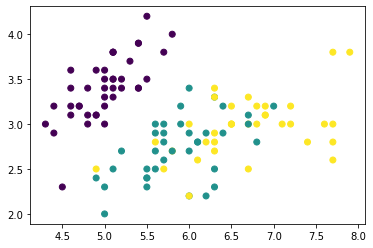

In [39]:
# визуализируем дискриминантную линию только по 2 признакам
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
plt.show()

In [40]:
small_train = X_train[(y_train == 0) | (y_train == 2)]
small_train = small_train[['sepal length (cm)', 'sepal width (cm)']]
sy_train = y_train[(y_train == 0) | (y_train == 2)]
small_test = X_test[(y_test == 0) | (y_test == 2)]
small_test = small_test[['sepal length (cm)', 'sepal width (cm)']]
sy_test = y_test[(y_test == 0) | (y_test == 2)]

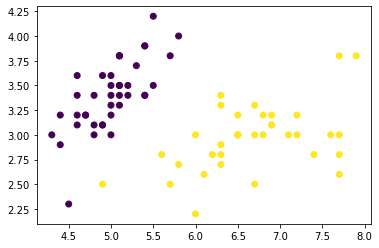

In [41]:
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
plt.show()

In [42]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

In [43]:
# посмотрим на наши центроиды
lda_small.means_

array([[5.        , 3.405     ],
       [6.66857143, 2.96571429]])

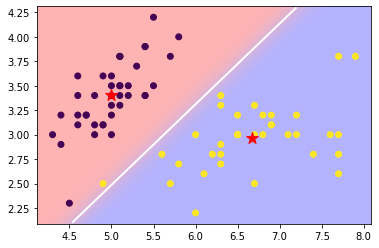

In [44]:
 # сам scatter plot
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [45]:
# второй признак важнее первого для кластеризации (это видно по визуализации)
lda_small.coef_

array([[  9.92811888, -12.03686835]])

In [46]:
# какая будет точность?
accuracy_score(sy_test, lda_small.predict(small_test))

1.0

In [47]:
#корреляция слабая
data[['sepal length (cm)', 'sepal width (cm)']].corr()

,sepal length (cm),sepal width (cm)
sepal length (cm),1.00000,-0.11757
sepal width (cm),-0.11757,1.00000


Кластеризация   
Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(data, test_size=0.25)

In [46]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()

In [53]:
# 

X_scaled_tr = scaler.fit_transform(X_train)
X_scaled_tr

array([[ 0.81187161,  0.24837253],
       [ 0.81187161, -0.64179462],
       [ 0.45056186,  0.69345611],
       [ 2.2571106 , -0.19671104],
       [ 0.69143502, -0.86433641],
       [ 1.17318136, -0.19671104],
       [-1.35598688,  0.24837253],
       [-1.47642347,  0.69345611],
       [ 2.2571106 ,  1.58362326],
       [ 1.41405452,  0.24837253],
       [-0.75380397,  0.91599789],
       [ 0.81187161, -0.19671104],
       [ 0.69143502,  0.24837253],
       [ 1.29361794,  0.24837253],
       [ 1.05274477,  0.02583074],
       [ 0.20968869, -0.86433641],
       [-0.27205764, -1.30941998],
       [ 0.20968869,  0.69345611],
       [ 1.77536427, -0.41925283],
       [ 0.33012528, -1.0868782 ],
       [-0.75380397,  2.25124862],
       [-0.39249422, -1.53196177],
       [-0.39249422, -1.30941998],
       [ 0.45056186, -1.97704535],
       [ 0.81187161, -0.19671104],
       [ 1.05274477, -0.19671104],
       [ 0.69143502,  0.24837253],
       [ 1.29361794,  0.02583074],
       [-0.99467713,

In [56]:
X_scaled_ts = scaler.transform(X_test)
X_scaled_ts

array([[-0.03118447, -1.0868782 ],
       [-0.03118447, -0.64179462],
       [ 0.57099844, -1.30941998],
       [-1.11511372,  1.13853968],
       [ 2.49798377,  1.58362326],
       [ 0.57099844, -1.75450356],
       [ 0.69143502, -0.41925283],
       [-0.03118447, -0.86433641],
       [-0.15162106, -0.41925283],
       [-0.75380397, -0.86433641],
       [ 0.69143502,  0.02583074],
       [ 1.29361794,  0.02583074],
       [-1.11511372, -1.53196177],
       [-1.11511372,  0.02583074],
       [-0.5129308 ,  1.80616505],
       [-0.03118447, -0.86433641],
       [ 0.08925211, -0.19671104],
       [ 1.05274477,  0.02583074],
       [-0.87424055, -1.30941998],
       [ 0.33012528, -0.19671104],
       [ 1.17318136,  0.24837253],
       [-0.99467713,  0.69345611],
       [-0.99467713,  0.91599789],
       [ 0.20968869, -0.41925283],
       [-1.11511372,  0.02583074],
       [ 1.05274477, -0.19671104],
       [ 0.69143502, -0.64179462],
       [-1.59686005, -1.75450356],
       [ 0.33012528,

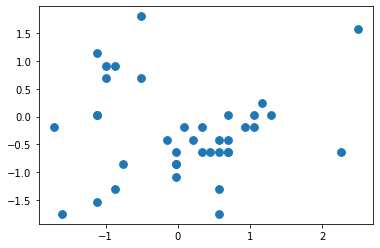

In [57]:
plt.scatter(X_scaled_ts[:, 0], X_scaled_ts[:, 1],cmap='autumn', s=60)

In [58]:
from sklearn.cluster import KMeans

In [59]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled_ts)
clusters

array([0, 0, 0, 1, 2, 0, 2, 0, 0, 0, 2, 2, 0, 1, 1, 0, 2, 2, 0, 2, 2, 1,
       1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2], dtype=int32)

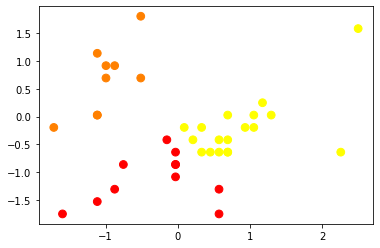

In [60]:
plt.scatter(X_scaled_ts[:, 0], X_scaled_ts[:, 1], cmap='autumn', c=clusters, s=60)

In [61]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled_ts)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

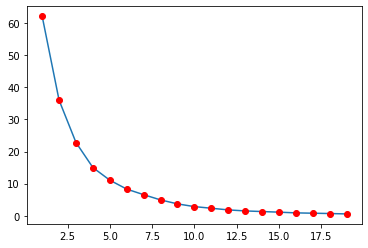

In [62]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

#Получается три кластера